# Use case of the models script
## Load in the packages and all the models

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from models import LogisticGrowth, SurfaceLimitedGrowth, VonBertalanffyGrowth, GompertzGrowth, ExponentialGrowth, LinearGrowth, MendelsohnGrowth, MontrollGrowth, ExponentialDecayGrowth, AlleeEffectGrowth, LinearLimitedGrowth, CombinedModel, StochasticGompertzGrowth
from models import GrowthModel as gm
import numpy as np
from scipy.integrate import solve_ivp
from math import exp

## Load in the data

In [2]:
ts = [
     3.46,  4.58,  5.67,  6.64,  7.63,  8.41,  9.32, 10.27, 11.19,
    12.39, 13.42, 15.19, 16.24, 17.23, 18.18, 19.29, 21.23, 21.99,
    24.33, 25.58, 26.43, 27.44, 28.43, 30.49, 31.34, 32.34, 33.00,
    35.20, 36.34, 37.29, 38.50, 39.67, 41.37, 42.58, 45.39, 46.38,
    48.29, 49.24, 50.19, 51.14, 52.10, 54.00, 56.33, 57.33, 59.38,
]
Vs = [
    0.0158, 0.0264, 0.0326, 0.0445, 0.0646, 0.0933, 0.1454, 0.2183, 0.2842,
    0.4977, 0.6033, 0.8441, 1.2163, 1.4470, 2.3298, 2.5342, 3.0064, 3.4044,
    3.2046, 4.5241, 4.3459, 5.1374, 5.5376, 4.8946, 5.0660, 6.1494, 6.8548,
    5.9668, 6.6945, 6.6395, 6.8971, 7.2966, 7.2268, 6.8815, 8.0993, 7.2112,
    7.0694, 7.4971, 6.9974, 6.7219, 7.0523, 7.1095, 7.0694, 8.0562, 7.2268, 
]

pd.DataFrame({'$t$': ts, '$V$': Vs}).T

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
$t$,3.4600,4.5800,5.6700,6.6400,7.6300,8.4100,9.3200,10.2700,11.1900,12.3900,...,46.3800,48.2900,49.2400,50.1900,51.1400,52.1000,54.0000,56.3300,57.3300,59.3800
$V$,0.0158,0.0264,0.0326,0.0445,0.0646,0.0933,0.1454,0.2183,0.2842,0.4977,...,7.2112,7.0694,7.4971,6.9974,6.7219,7.0523,7.1095,7.0694,8.0562,7.2268


## Examples how to use the script
### Example 1: using GompertzGrowth and the following parameters rungekutta and AIC. Here we switch from direct to bayesian to random to see the diferent parameters they choose.

In [3]:
linear_growth = GompertzGrowth(solver="rungekutta", optimizer="direct", evaluation="AIC")
print(repr(linear_growth))
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

GompertzGrowth
{'V0': 4.2274589843750014, 'c': 1.0}


In [ ]:
linear_growth = GompertzGrowth(solver="rungekutta", optimizer="bayesian", evaluation="AIC")
print(linear_growth.optimizer)
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

<bound method GrowthModel.bayesian_search of GompertzGrowth>


In [ ]:
linear_growth = GompertzGrowth(solver="rungekutta", optimizer="random", evaluation="AIC")
print(linear_growth.optimizer)
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

<bound method GrowthModel.random_search of GompertzGrowth>


TypeError: 'module' object is not callable. Did you mean: 'random.random(...)'?

In [ ]:
linear_growth = ExponentialDecayGrowth(solver="euler", optimizer="direct", evaluation="AIC")
print(linear_growth.optimizer)
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)


<bound method GrowthModel.direct_search of ExponentialDecayGrowth>
{'Vmax': 11.317612572388553, 'V0': 9.536743164062508e-09, 'c': 0.01895595734241281}


In [ ]:
model = LinearGrowth(solver="rungekutta", optimizer="direct", evaluation="AIC")
print(linear_growth.optimizer)
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

<bound method GrowthModel.direct_search of ExponentialDecayGrowth>
{'Vmax': 11.317612572388553, 'V0': 9.536743164062508e-09, 'c': 0.01895595734241281}


In [ ]:
linear_growth = ExponentialGrowth(solver="rungekutta", optimizer="direct", evaluation="AIC")
print(linear_growth.optimizer)
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

<bound method GrowthModel.direct_search of ExponentialGrowth>
{'V0': 1.5558863094764115, 'c': 0.030828315053585784}


In [ ]:
linear_growth = MendelsohnGrowth(solver="rungekutta", optimizer="direct", evaluation="AIC")
print(linear_growth.optimizer)
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

<bound method GrowthModel.direct_search of MendelsohnGrowth>
{'V0': -0.009898077269765743, 'c': 0.14479153058675198, 'd': 0.039943861319035705}


In [ ]:
linear_growth = VonBertalanffyGrowth(solver="rungekutta", optimizer="direct", evaluation="AIC")
print(linear_growth.optimizer)
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

<bound method GrowthModel.direct_search of VonBertalanffyGrowth>
{'V0': 9.536743164062508e-09, 'c': 2.4392514665883396, 'd': 1.4805971422436126}


In [ ]:
linear_growth = GompertzGrowth(solver="rungekutta", optimizer="bayesian", evaluation="AIC")
print(linear_growth.optimizer)
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

<bound method GrowthModel.bayesian_search of GompertzGrowth>
{'V0': 0.24039362616374346, 'c': 5.252498855981308}


In [ ]:
linear_growth = GompertzGrowth(solver="rungekutta", optimizer="direct", evaluation="AIC")
print(linear_growth.optimizer)
linear_growth.fit_data(data_ts=ts, data_ys=Vs)
print(linear_growth.params)

<bound method GrowthModel.direct_search of GompertzGrowth>
{'V0': 9.536743164062508e-09, 'c': 0.32104206575800004}


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from models import LogisticGrowth, VonBertalanffyGrowth, GompertzGrowth, ExponentialGrowth, LinearGrowth, ExponentialDecayGrowth, AlleeEffectGrowth, LinearLimitedGrowth, CombinedModel, StochasticGompertzGrowth
from models import GrowthModel as gm
import numpy as np
from scipy.integrate import solve_ivp
from math import exp

ts = [
    3.46,  4.58,  5.67,  6.64,  7.63,  8.41,  9.32, 10.27, 11.19,
    12.39, 13.42, 15.19, 16.24, 17.23, 18.18, 19.29, 21.23, 21.99,
    24.33, 25.58, 26.43, 27.44, 28.43, 30.49, 31.34, 32.34, 33.00,
    35.20, 36.34, 37.29, 38.50, 39.67, 41.37, 42.58, 45.39, 46.38,
    48.29, 49.24, 50.19, 51.14, 52.10, 54.00, 56.33, 57.33, 59.38,
]
Vs = [
    0.0158, 0.0264, 0.0326, 0.0445, 0.0646, 0.0933, 0.1454, 0.2183, 0.2842,
    0.4977, 0.6033, 0.8441, 1.2163, 1.4470, 2.3298, 2.5342, 3.0064, 3.4044,
    3.2046, 4.5241, 4.3459, 5.1374, 5.5376, 4.8946, 5.0660, 6.1494, 6.8548,
    5.9668, 6.6945, 6.6395, 6.8971, 7.2966, 7.2268, 6.8815, 8.0993, 7.2112,
    7.0694, 7.4971, 6.9974, 6.7219, 7.0523, 7.1095, 7.0694, 8.0562, 7.2268, 
]

pd.DataFrame({'$t$': ts, '$V$': Vs}).T

tmin, tmax = min(ts), max(ts)
tdata = [2.0 * (t - tmin) / (tmax - tmin) -1 for t in ts]

Vmax = max(Vs)
Vdata = [V / Vmax for V in Vs]
tumormodels = (
    LinearGrowth,
    ExponentialGrowth,
    ExponentialDecayGrowth,
    VonBertalanffyGrowth,
    GompertzGrowth,
    LinearLimitedGrowth,
    LogisticGrowth,
    AlleeEffectGrowth,
    CombinedModel,
    StochasticGompertzGrowth,
)
ts = [i / 20 - 1.0 for i in range(41)]

In [ ]:
model = LinearGrowth(solver='rungekutta', optimizer='bayesian', evaluation='BIC')
model.fit_data(tdata, Vdata)
str(model)
repr(model)

'LinearGrowth'


Fitting model: LinearGrowth
Parameters for c: {'V0': 0.5219535827636719, 'c': 1.0}
Evaluation Metric (AIC): -87.70566193787204

Fitting model: ExponentialGrowth
Parameters for c * V: {'V0': 0.5219535827636719, 'c': 1.0}
Evaluation Metric (AIC): -87.70566193787204

Fitting model: ExponentialDecayGrowth
Parameters for c * (Vmax - V): {'Vmax': 1.0, 'V0': 0.5219535827636719, 'c': 1.0}
Evaluation Metric (AIC): -85.70566193787204

Fitting model: VonBertalanffyGrowth
Parameters for c * (V^(2/3)) - d * V: {'c': 1.0, 'd': 1.0, 'V0': 0.5219535827636719}
Evaluation Metric (AIC): -85.70566193787204

Fitting model: GompertzGrowth
Parameters for c * V * ln(1/V): {'V0': 0.5219535827636719, 'c': 1.0}
Evaluation Metric (AIC): -87.70566193787204

Fitting model: LinearLimitedGrowth
Parameters for c * (V / (V + d)): {'c': 1.0, 'd': 1.0, 'V0': 0.5219535827636719}
Evaluation Metric (AIC): -85.70566193787204

Fitting model: LogisticGrowth
Parameters for c * V * (Vmax - V): {'Vmax': 1.0, 'V0': 0.521953582763

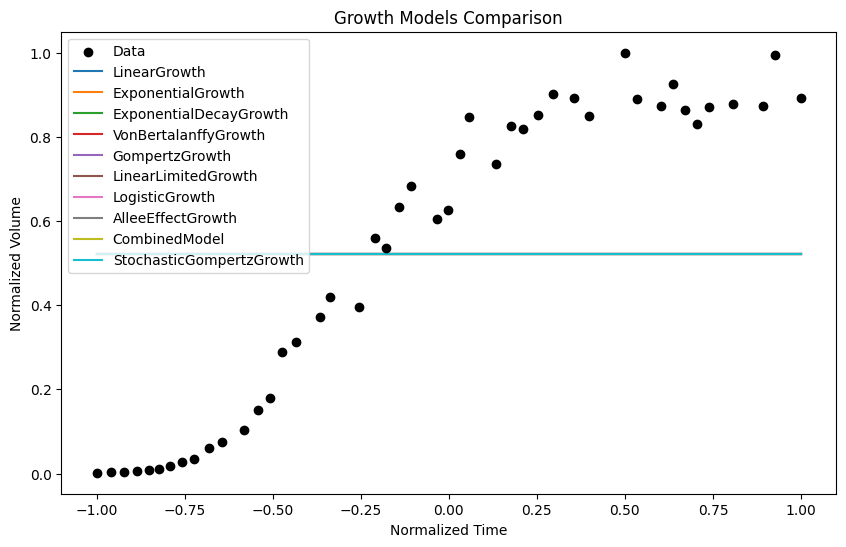

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(tdata, Vdata, color='black', label='Data', zorder=5)
plt.xlabel('Normalized Time')
plt.ylabel('Normalized Volume')
plt.title('Growth Models Comparison')
    
solver = "euler"
optimizer = "direct"
evaluation = "AIC"

for model_class in tumormodels:
    model = model_class(solver=solver, optimizer=optimizer, evaluation=evaluation)
    print(f"\nFitting model: {repr(model)}")
    model.fit_data(tdata, Vdata)
    print(f"Parameters for {str(model)}: {model.params}")
    print(f"Evaluation Metric ({evaluation}): {model.evaluation()}")

    # Plot 
    predicted_values = [model.solver(t) for t in ts]
    plt.plot(ts, predicted_values, label=repr(model))

plt.legend()
plt.show()

Keuze uit ODE solvers:
- Euler
- Runge-kutta
- Heun
- 

Keuze uit searches:
- direct
- random

LinearGrowth


C:\Users\aimee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 0.01] before, using random point [1.2445819581530149, 1.8739419321604547]
  warnings.warn(
C:\Users\aimee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 0.01] before, using random point [7.944622802519781, 3.43824001873397]
  warnings.warn(


{'c': 0.11351983255301089, 'V0': 0.025158047737746513}
ExponentialGrowth


C:\Users\aimee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 0.01] before, using random point [1.2445819581530149, 1.8739419321604547]
  warnings.warn(


{'c': 0.01, 'V0': 0.6847934577578667}
ExponentialDecayGrowth
{'Vmax': 10.0, 'c': 0.01, 'V0': 0.1837492271684149}
VonBertalanffyGrowth
{'d': 10.0, 'c': 10.0, 'V0': 0.01}
GompertzGrowth
{'c': 5.490548699854479, 'V0': 0.6598802308927012}
LinearLimitedGrowth
{'d': 10.0, 'c': 10.0, 'V0': 0.2689781718930606}
LogisticGrowth
{'Vmax': 4.597896430739014, 'c': 3.3437490252788287, 'V0': 1.4372395110401888}
AlleeEffectGrowth
{'c': 3.870631734241815, 'V0': 0.01, 'Vmin': 2.7353934579369326, 'Vmax': 0.01, 'd': 7.0763891077095575}
CombinedModel
{'d': 1.5947241546850137, 'c': 6.554939237645372, 'V0': 0.49673580113266175, 'Vmax': 6.947229083455628}


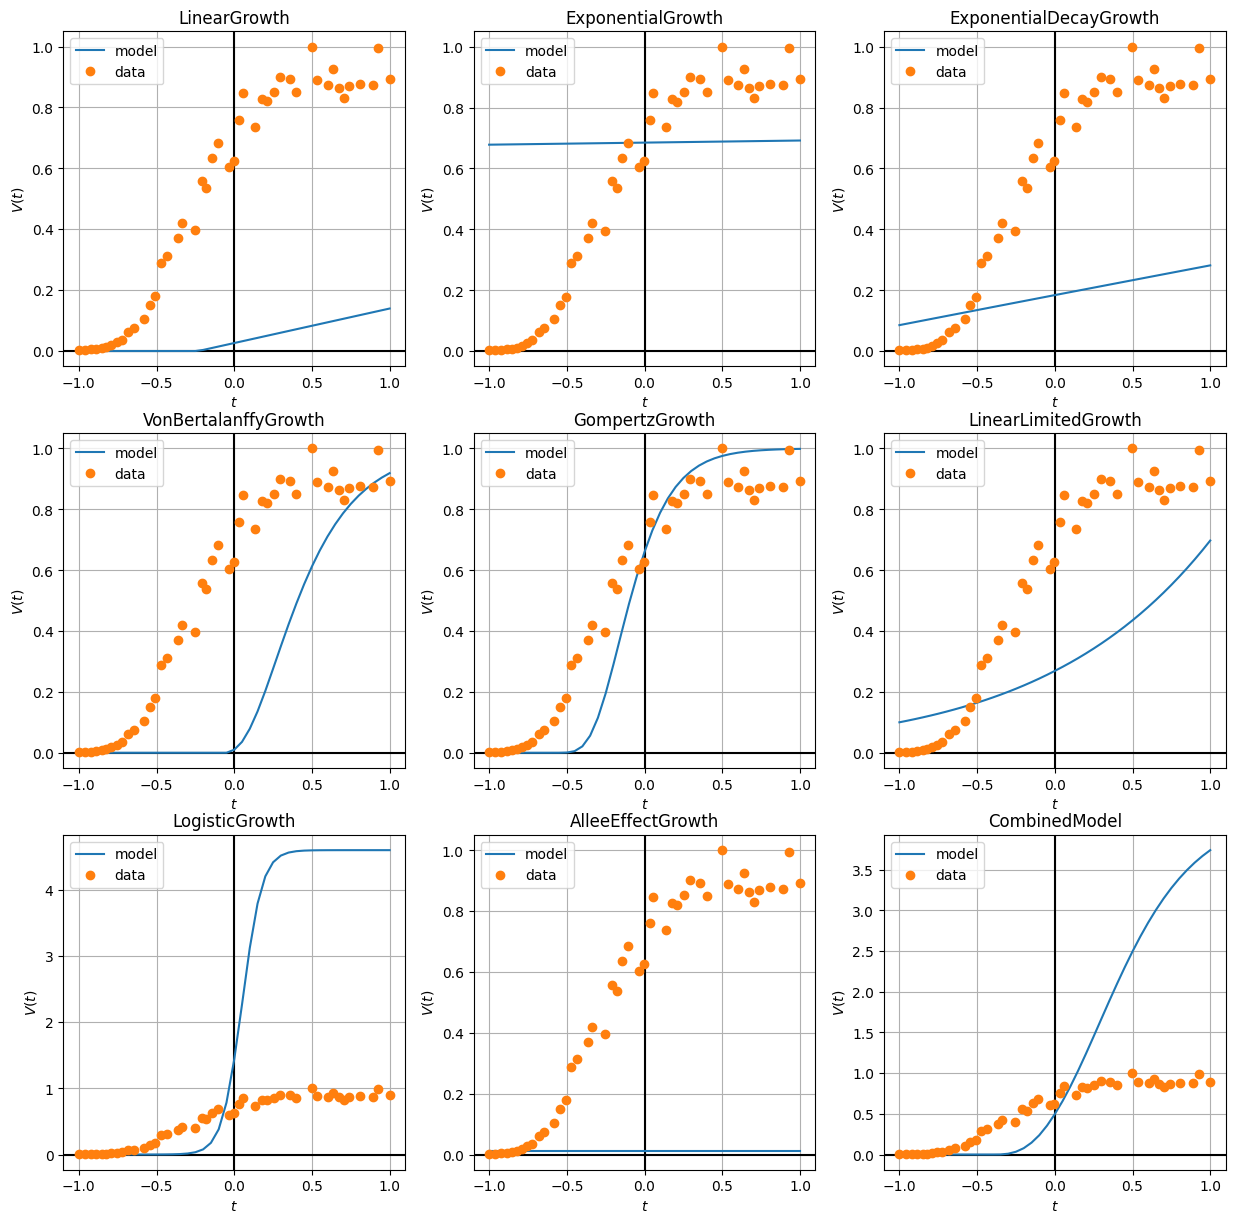

In [ ]:
results = {'model': [], 'formula': [], 'BIC': [], 'AIC': [], 'AICc': []}

plt.figure(figsize=(15, 20))

for fig, tumormodel in enumerate(tumormodels, start=1):
    print(tumormodel.__name__)
    model = tumormodel(solver='rungekutta', optimizer='bayesian', evaluation='BIC')
    model.fit_data(tdata, Vdata)
    print(model.params)
    
    results['model'].append(repr(model))
    results['formula'].append(str(model))
    results['BIC'].append(model.eval_bic())
    results['AIC'].append(model.eval_aic())
    results['AICc'].append(model.eval_aicc())
    
    Vs = [model.solver(t) for t in ts]
    
    plt.subplot(4, 3, fig)
    plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
    plt.plot(ts, Vs, '-', label='model')
    plt.plot(tdata, Vdata, 'o', label='data')
    plt.title(model.__class__.__name__)
    plt.xlabel('$t$'); plt.ylabel('$V(t)$')
    plt.grid(True); plt.legend()
    
plt.show()

In [ ]:
pd.DataFrame(results).set_index('model').sort_values('BIC')


,formula,BIC,AIC,AICc
model,,,,
GompertzGrowth,c * V * ln(1/V),-167.875940,-171.489265,-171.322599
VonBertalanffyGrowth,c * (V^(2/3)) - d * V,-160.964459,-166.384446,-166.140544
LinearLimitedGrowth,c * (V / (V + d)),-142.646427,-148.066415,-147.822512
ExponentialGrowth,c * V,-76.597360,-80.210685,-80.044018
LinearGrowth,c,-40.894906,-44.508231,-44.341565
ExponentialDecayGrowth,c * (Vmax - V),-34.849972,-40.269959,-40.026057
AlleeEffectGrowth,c * (V - Vmin) * (Vmax - V),8.013179,-1.020134,-0.609877
LogisticGrowth,c * V * (Vmax - V),135.587908,130.167921,130.411823
CombinedModel,c * (V^(2/3)) * (1 - V/V_max) - d * V,217.793148,210.566498,210.891498


LinearGrowth
{'c': 0.5801448669433594, 'V0': 0.5637222766876221}
ExponentialGrowth
{'c': 0.8646508859863281, 'V0': 0.5065558808898926}
ExponentialDecayGrowth
{'Vmax': 0.9852838595015053, 'c': 1.9263037102781293, 'V0': 0.6955448213368011}
VonBertalanffyGrowth
{'d': 8.951728830006244, 'c': 8.757360850193715, 'V0': 0.708315795396593}
GompertzGrowth
{'c': 2.8381938078689837, 'V0': 0.6924690442406249}
LinearLimitedGrowth
{'d': -0.0463330055825, 'c': 0.5500787422265624, 'V0': 0.5661699096679688}
LogisticGrowth
{'Vmax': 0.8984142163015957, 'c': 6.070156262082566, 'V0': 0.7285673978901765}
AlleeEffectGrowth
{'c': 1.6817501416704002, 'V0': 0.7014928087999999, 'Vmin': -0.7879447343615998, 'Vmax': 0.9475214299999998, 'd': 1.0}
CombinedModel
{'d': -0.706090029574044, 'c': 3.4534574819382535, 'V0': 0.7161878437795711, 'Vmax': 0.7636221230212507}


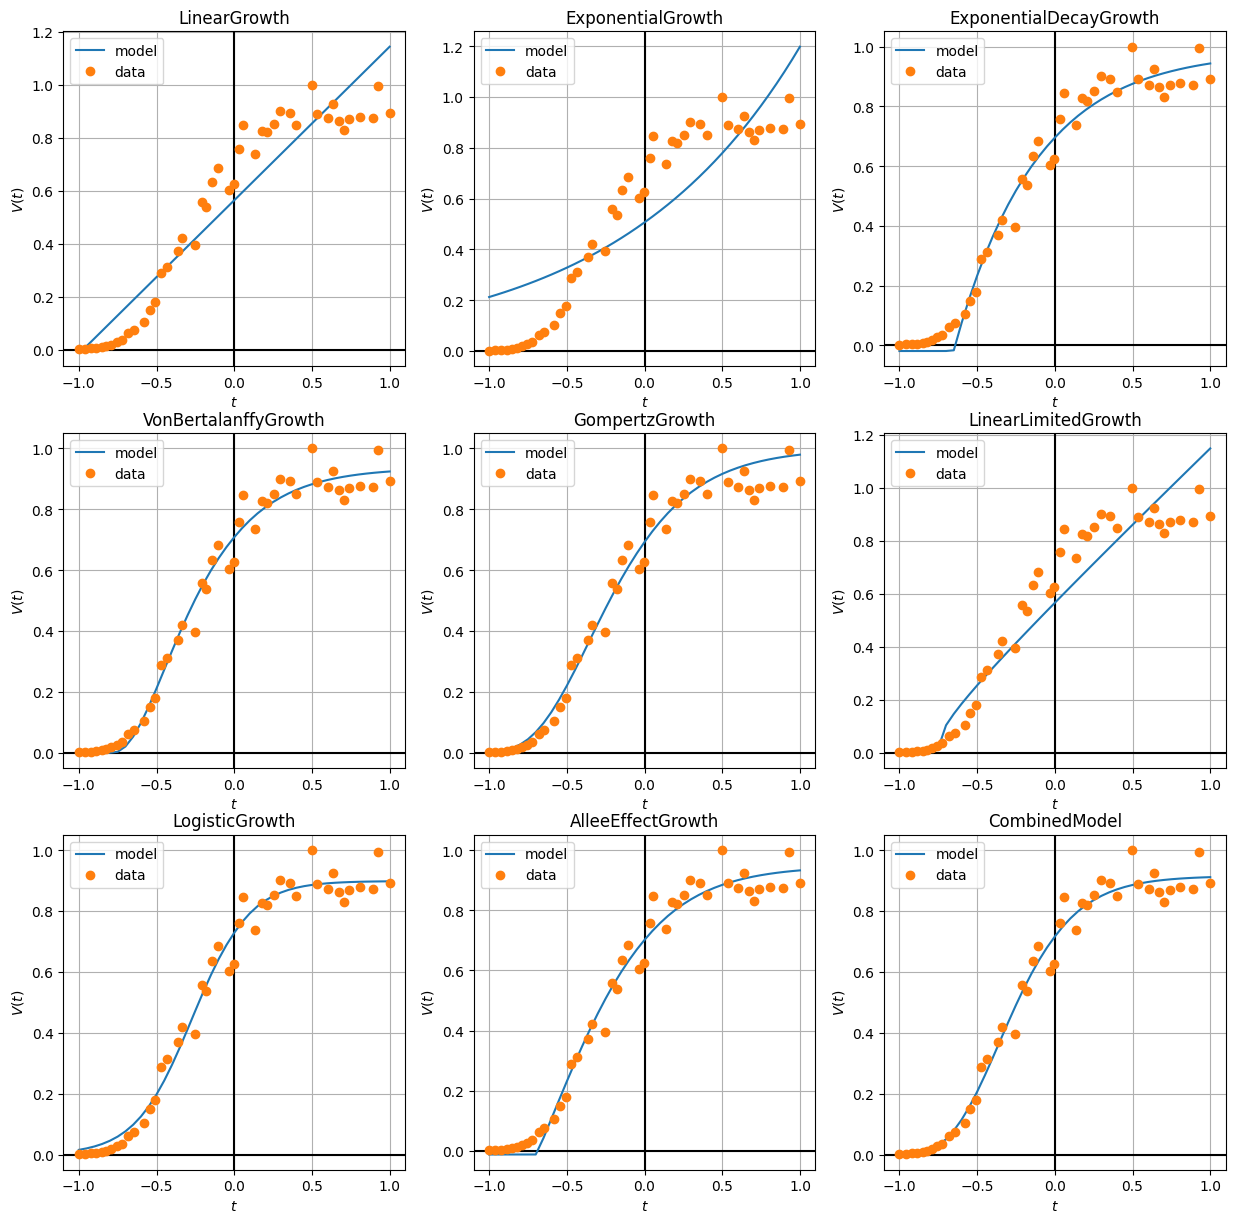

In [ ]:
results = {'model': [], 'formula': [], 'BIC': [], 'AIC': [], 'AICc': []}

plt.figure(figsize=(15, 20))

for fig, tumormodel in enumerate(tumormodels, start=1):
    print(tumormodel.__name__)
    model = tumormodel(solver='rungekutta', optimizer='direct', evaluation='BIC')
    model.fit_data(tdata, Vdata)
    print(model.params)

    results['model'].append(repr(model))
    results['formula'].append(str(model))
    results['BIC'].append(model.eval_bic())
    results['AIC'].append(model.eval_aic())
    results['AICc'].append(model.eval_aicc())
    
    Vs = [model.euler_method(t) for t in ts]
    
    plt.subplot(4, 3, fig)
    plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
    plt.plot(ts, Vs, '-', label='model')
    plt.plot(tdata, Vdata, 'o', label='data')
    plt.title(model.__class__.__name__)
    plt.xlabel('$t$'); plt.ylabel('$V(t)$')
    plt.grid(True); plt.legend()
    
plt.show()

In [ ]:
pd.DataFrame(results).set_index('model').sort_values('BIC')


,formula,BIC,AIC,AICc
model,,,,
VonBertalanffyGrowth,c * (V^(2/3)) - d * V,-267.699734,-273.119721,-272.875819
CombinedModel,c * (V^(2/3)) * (1 - V/V_max) - d * V,-267.314318,-274.540968,-274.215968
LogisticGrowth,c * V * (Vmax - V),-265.502164,-270.922152,-270.678250
GompertzGrowth,c * V * ln(1/V),-257.602727,-261.216052,-261.049385
ExponentialDecayGrowth,c * (Vmax - V),-252.902134,-258.322121,-258.078219
AlleeEffectGrowth,c * (V - Vmin) * (Vmax - V),-252.156619,-261.189932,-260.779675
LinearLimitedGrowth,c * (V / (V + d)),-187.065580,-192.485567,-192.241665
LinearGrowth,c,-186.212336,-189.825661,-189.658995
ExponentialGrowth,c * V,-38.661015,-42.274340,-42.107673


In [ ]:
# eigen gemaakt van internet
model = CombinedModel(solver='euler', optimizer='direct', evaluation='BIC')
model.fit_data(tdata, Vdata)
str(model)
repr(model)
model.params

{'d': -0.1216731506058573,
 'c': 3.769419279549039,
 'Vmax': 0.8884323666053608,
 'V0': 0.7155968358608781}

In [ ]:
# eigen gemaakt van internet

In [ ]:
# eigen gemaakt van internet

In [ ]:
# eigen gemaakt van internet